### Fit T2R traces for Q6_4p69

In [13]:
from pathlib import Path

from betata.qubit_measurements.qubit import Qubit, load_qubit
from betata.qubit_measurements.traces import T2RTrace, load_t2r_traces, save_t2r_results
from betata.qubit_measurements.fit_t2r_traces.fit_t2r_traces import fit_t2r_trace, plot_t2r_trace, plot_t2r_vs_time

CWD = Path.cwd()

Specify input folder and output file

In [14]:
qubit_name = "Q6_4p69"
input_folder = CWD / f"data/qubit_measurements/{qubit_name}/T2R_{qubit_name}"
output_folder = CWD / f"out/qubit_measurements/{qubit_name}/T2R_{qubit_name}"
qubit_file = CWD / f"out/qubit_measurements/{qubit_name}.h5"

Load qubit

In [15]:
qubit: Qubit = load_qubit(qubit_file)

Load traces

In [16]:
traces: list[T2RTrace] = load_t2r_traces(input_folder)

Fit traces and save plots

In [17]:
fit_results = {}
for trace in traces:
    fit_result = fit_t2r_trace(trace, plot=False)
    fit_results[trace.id] = fit_result

Inspect and exclude certain traces

In [18]:
traces_to_inspect = []
for trace in traces:
    if trace.id in traces_to_inspect:
        plot_t2r_trace(trace, fit_params=fit_results[trace.id].params)

In [19]:
bad_fits_to_exclude = [
    1, 2, 3, 4, 7, 8, 9, 10, 11, 18, 19, 21, 23, 25, 26, 41, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 69, 73, 74, 75, 79, 81, 82, 85, 87, 88, 93, 99, 101, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 131, 133, 136, 140, 141, 142, 144, 164, 165, 166, 167, 196, 198, 202, 203, 205, 232, 234, 235, 236, 237, 238, 245, 249, 250, 252, 253, 254, 255, 257, 319, 329, 342, 352, 390, 394, 398, 401, 402, 452, 455, 459, 705,
]

for trace in traces:
    if trace.id in bad_fits_to_exclude:
        trace.is_excluded = True
    else:
        trace.is_excluded = False

included_traces = [tr for tr in traces if not tr.is_excluded]

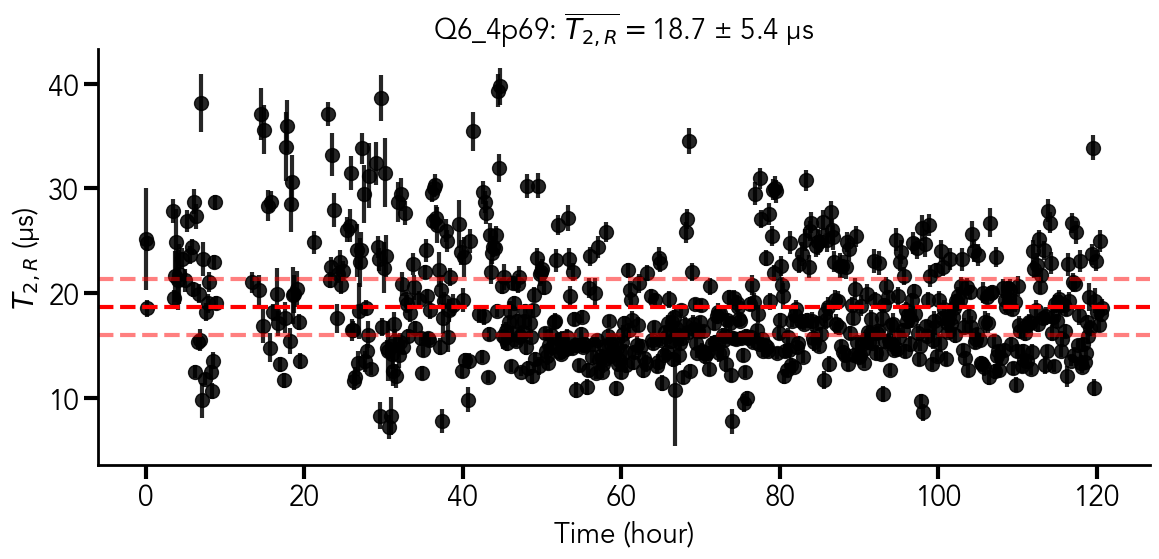

In [20]:
t2e_vs_time_fig = plot_t2r_vs_time(included_traces, qubit.name)

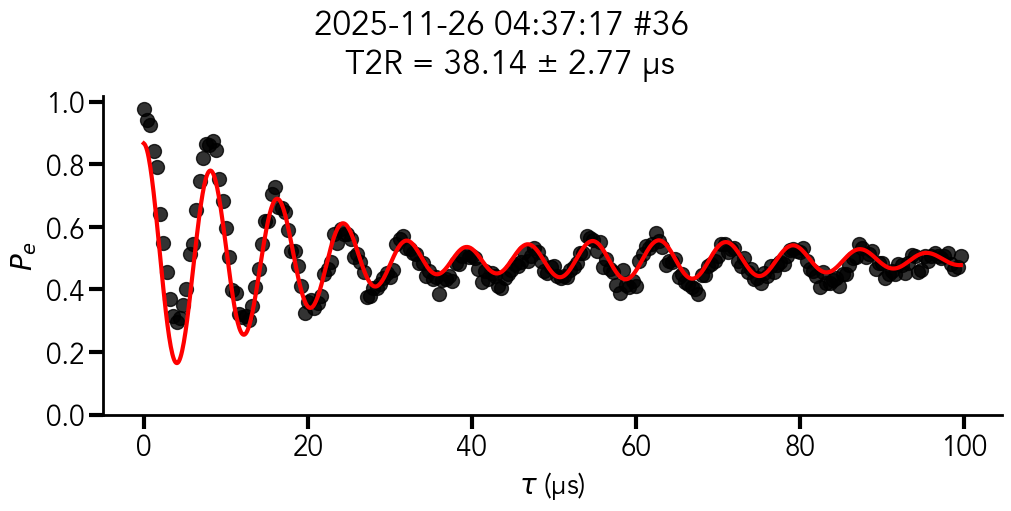

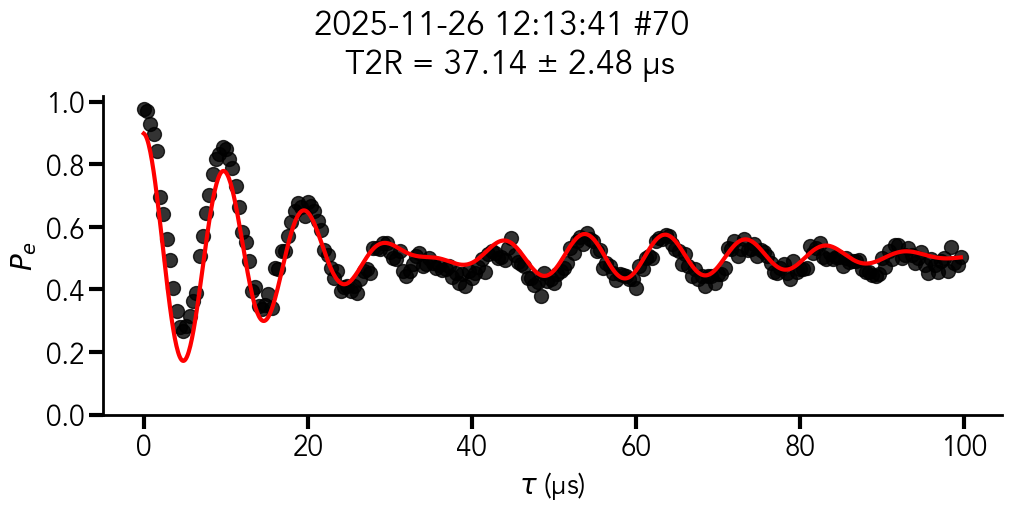

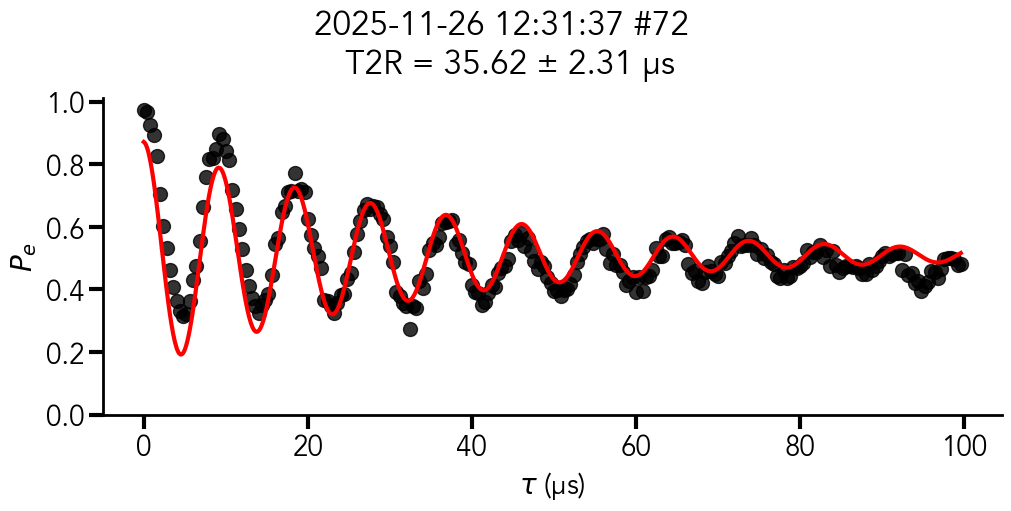

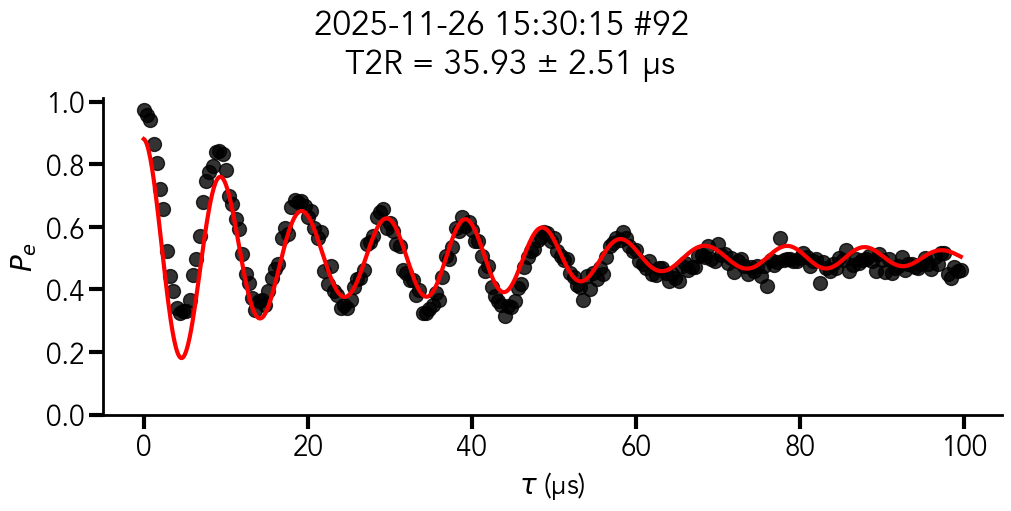

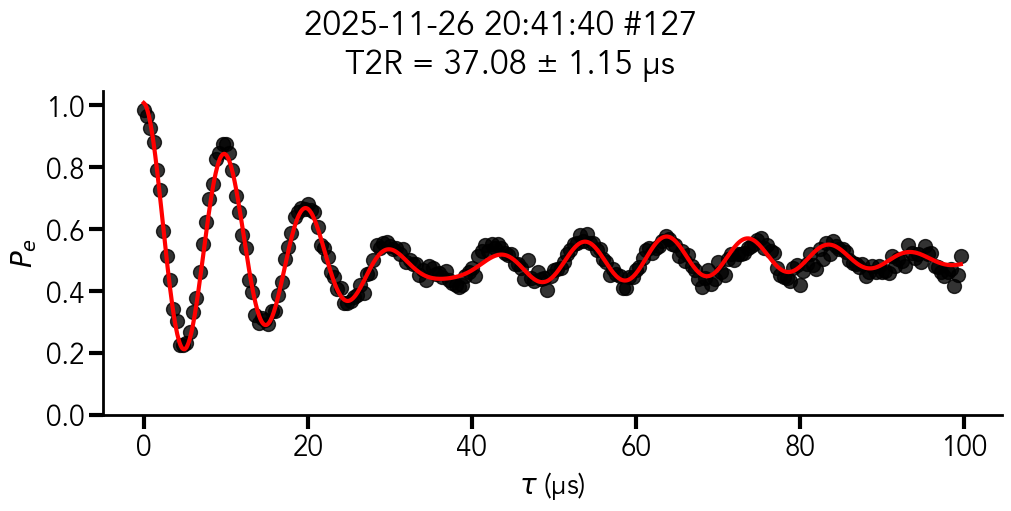

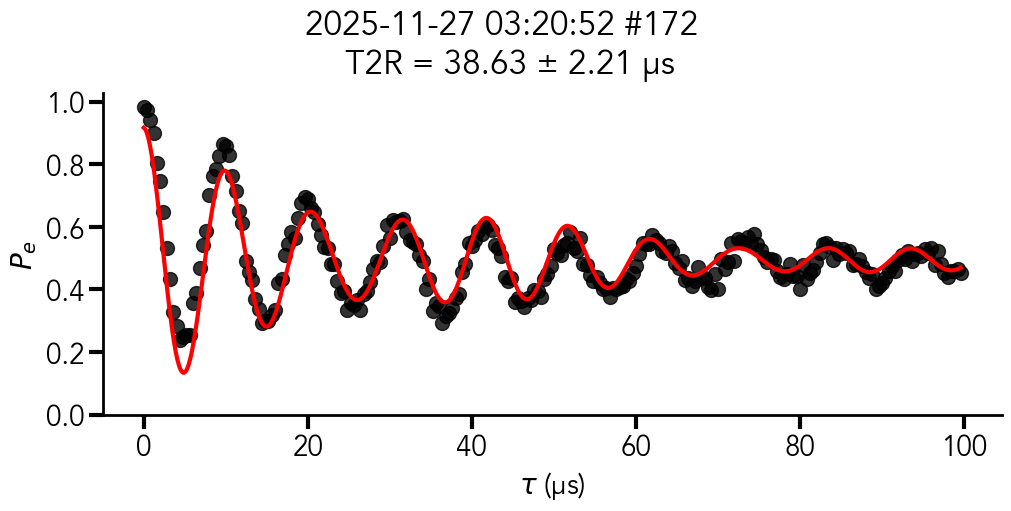

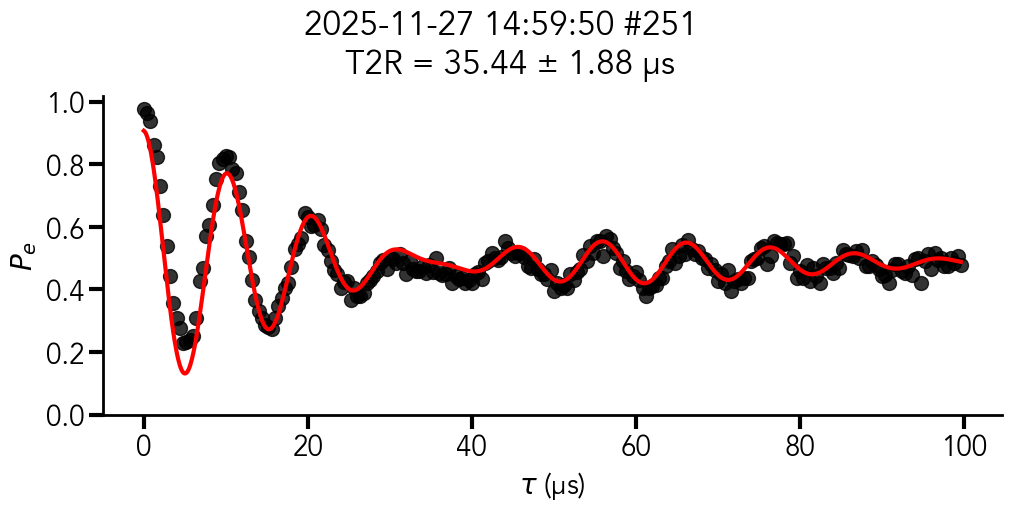

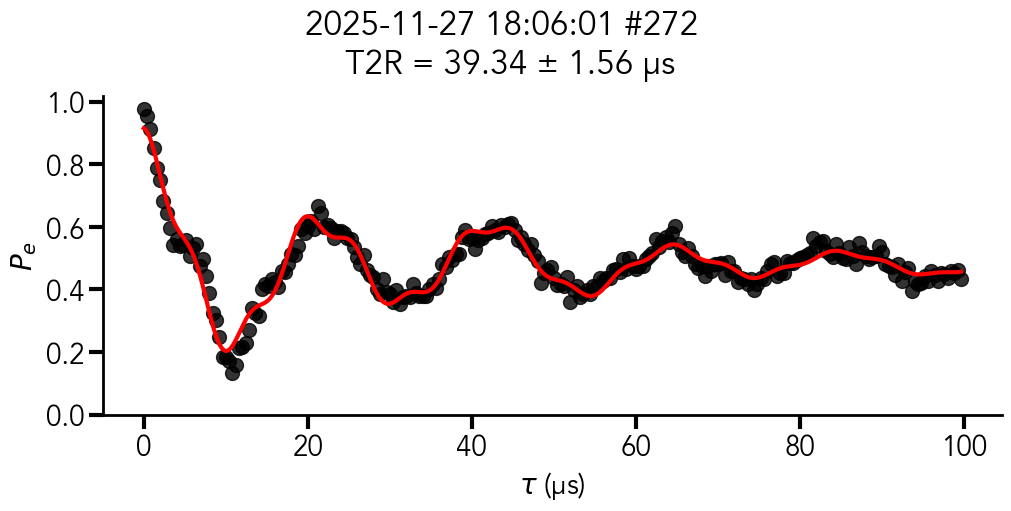

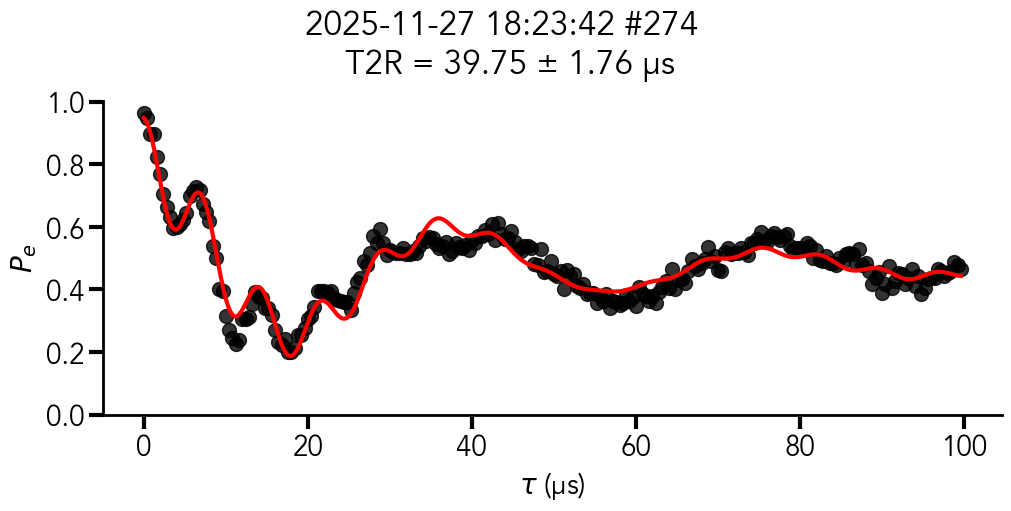

In [21]:
for trace in included_traces:
    if trace.T2R > 35e-6:
        plot_t2r_trace(trace, fit_params=fit_results[trace.id].params)

Save fit results to qubit file

In [ ]:
save_t2r_results(included_traces, qubit)